# Online Retail Lab

- [source](https://archive.ics.uci.edu/dataset/352/online+retail)

## Requirements

execute the following command to install the required packages:

```bash
pip install -r requirements.txt
```

In [2]:
"""Import data from excel file"""
import pandas
data = pandas.read_excel('OnlineRetailLight.xlsx')

In [3]:
"""Get information about the data"""
# Muestra las primeras filas del DataFrame
print(data.head())
# Muestra información general del DataFrame
print(data.info())
# Obtiene estadísticas descriptivas del DataFrame
print(data.describe())
# Obtiene el número de filas y columnas en el DataFrame
filas, columnas = data.shape
print(f'Número de filas: {filas}, Número de columnas: {columnas}')
# Obtiene los nombres de las columnas
print('Nombres de las columnas:', data.columns)


  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176899 entries, 0 to 176898
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       -----------

In [4]:
"""Calculate new columns"""
# Calculates the 'Date' column'
data['Date'] = pandas.to_datetime(data['InvoiceDate'])
# Calculate the total (multiply the quantity by UnitPrice)
data['Total'] = data['Quantity'] * data['UnitPrice']

Media: 5.093798387780598
Mediana: 2.21
Varianza: 10010.881726513962
Desviación Estándar: 100.05439383912115


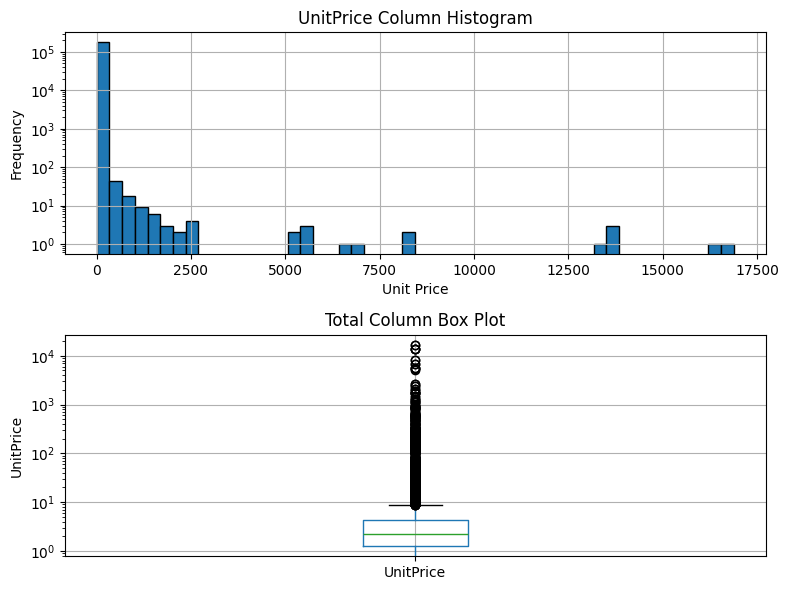

In [5]:
import matplotlib.pyplot as plt
"""Get median and mean"""
# Calcula la media y mediana
media = data['UnitPrice'].mean()
mediana = data['UnitPrice'].median()
variance = data['UnitPrice'].var()
standard_deviation = data['UnitPrice'].std()
print("Media:", media)
print("Mediana:", mediana)
print("Varianza:", variance)
print("Desviación Estándar:", standard_deviation)

# Crea un histograma y un diagrama de caja para la columna 'Total'
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 6))
# Histograma
data["UnitPrice"].hist(bins=50, edgecolor='black', ax=axes[0])  # Aumenta el número de bins
axes[0].set_yscale('log')  # Escala logarítmica en el eje y
axes[0].set_title('UnitPrice Column Histogram')
axes[0].set_xlabel('Unit Price')
axes[0].set_ylabel('Frequency')
axes[1].set_yscale('log') 

# Diagrama de caja
data.boxplot(column='UnitPrice', ax=axes[1])
axes[1].set_title('Total Column Box Plot')
axes[1].set_ylabel('UnitPrice') 

plt.tight_layout()
plt.show()


In [6]:
"""Sanitize data"""
# Exclude negative values
sanitized = data.loc[data['Quantity'] > 0, :]
sanitized = sanitized.loc[data['UnitPrice'] < 3000, :]

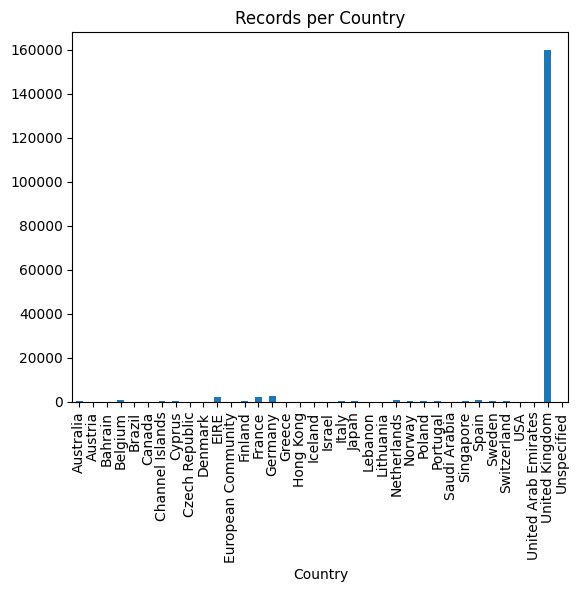

In [7]:
"""Records per Country"""
import matplotlib.pyplot as plt
result = sanitized.groupby('Country')['InvoiceNo'].agg(Count='count').reset_index()
result.plot(kind='bar', x='Country', y='Count', legend=False)
plt.title('Records per Country')
plt.show()

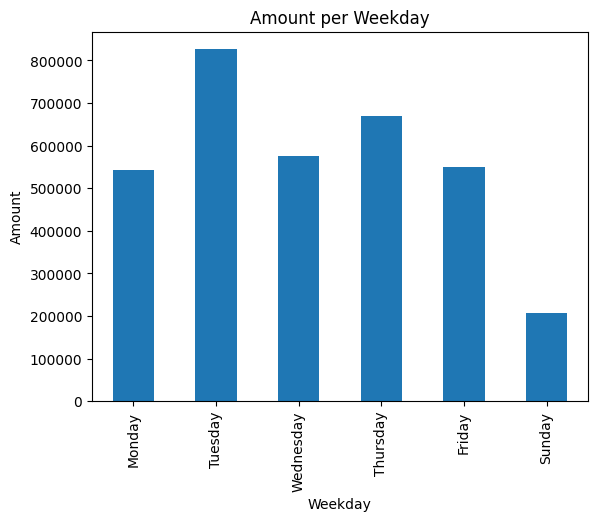

In [8]:

# Group by day of the week and calculate the sum of the total
result = sanitized.groupby(data['Date'].dt.day_name()).agg({'Total': 'sum'}).reset_index()
# Defines the desired order of the days of the week
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
# Convert 'InvoiceDate' column to category with desired order
result['Date'] = pandas.Categorical(result['Date'], categories=days, ordered=True)
# Sort the DataFrame by days of the week
result = result.sort_values('Date')
result.plot(kind='bar', x='Date', y='Total', legend=False)
plt.title('Amount per Weekday')
plt.xlabel('Weekday')
plt.ylabel('Amount')
plt.show()


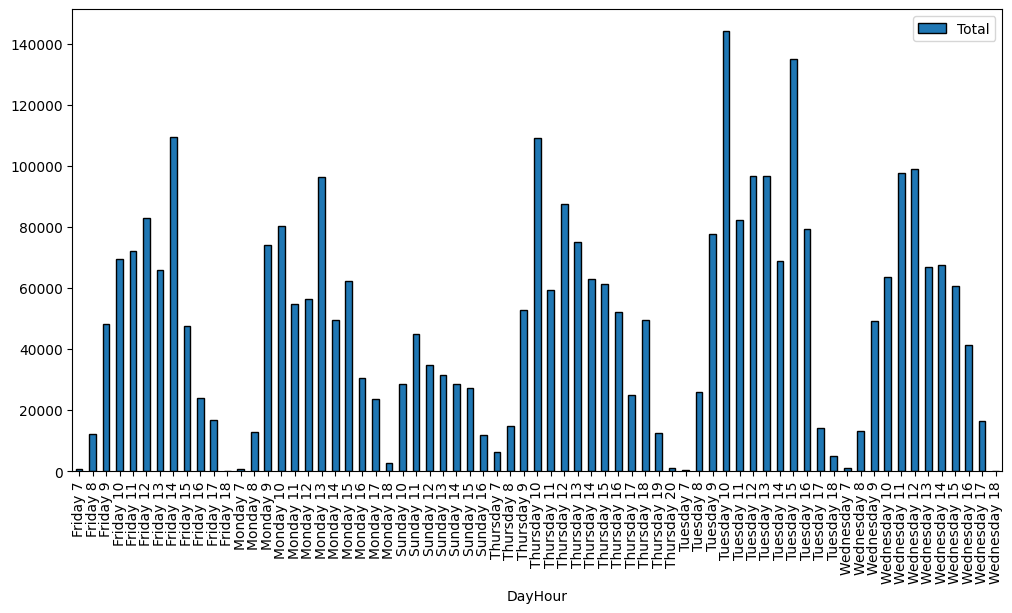

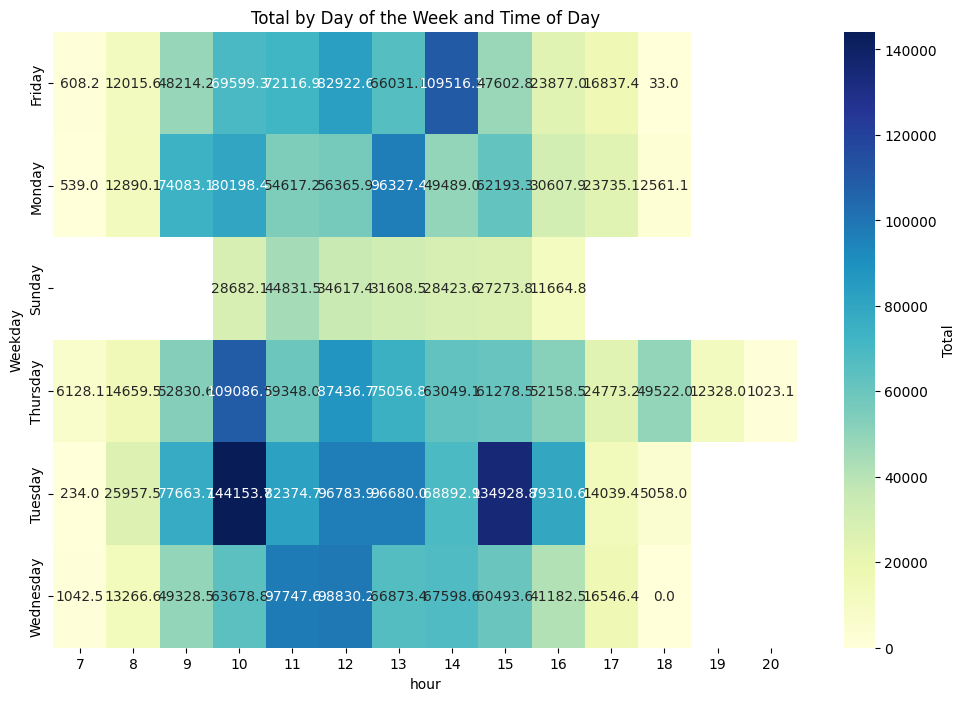

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
# Agrupa por día de la semana y hora del día y calcula la suma del total
sanitized['DayOfWeek'] = sanitized['Date'].dt.day_name()
sanitized['HourOfDay'] = sanitized['Date'].dt.hour

result = sanitized.groupby(['DayOfWeek', 'HourOfDay'])['Total'].sum().reset_index()

# Combina las columnas 'DayOfWeek' y 'HourOfDay' en una nueva columna 'DayHour'
result['DayHour'] = result['DayOfWeek'] + ' ' + result['HourOfDay'].astype(str)
result.plot(kind='bar', x='DayHour', y='Total', figsize=(12, 6), edgecolor='black')

# Crea un DataFrame pivot para facilitar la creación del heatmap
heatmap_data = result.pivot(index='DayOfWeek', columns='HourOfDay', values='Total')

# Gráfico de calor (heatmap)
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap="YlGnBu", annot=True, fmt=".1f", cbar_kws={'label': 'Total'})
plt.title('Total by Day of the Week and Time of Day')
plt.xlabel('hour')
plt.ylabel('Weekday')

plt.show()